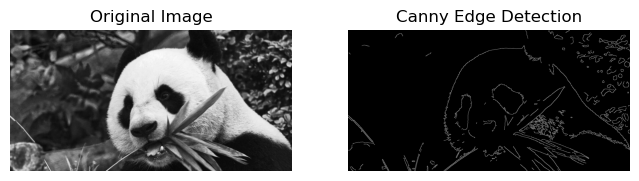

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('totempanda.jpg', cv2.IMREAD_GRAYSCALE) 


blurred_image = cv2.GaussianBlur(image, (5, 5), 0)


# The two arguments are the minVal and maxVal for the hysteresis thresholding
edges = cv2.Canny(blurred_image, 100, 200)


plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


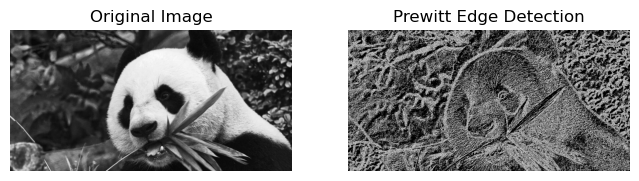

In [16]:
# Step 2: Define the Prewitt kernels (operators for edge detection)
prewitt_kernel_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

prewitt_kernel_y = np.array([[-1, -1, -1],
                             [ 0,  0,  0],
                             [ 1,  1,  1]])

# Step 3: Convolve the image with the Prewitt kernels in both x and y directions
edge_x = cv2.filter2D(image, -1, prewitt_kernel_x)  # Convolution with x kernel
edge_y = cv2.filter2D(image, -1, prewitt_kernel_y)  # Convolution with y kernel

# Step 4: Calculate the gradient magnitude (edge strength)
edges = np.sqrt(np.square(edge_x) + np.square(edge_y))  # Magnitude of the gradient

# Step 5: Normalize the result to fit in the range 0-255
edges = np.uint8(np.absolute(edges))  # Convert to uint8 for visualization

# Step 6: Display the result
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Prewitt Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


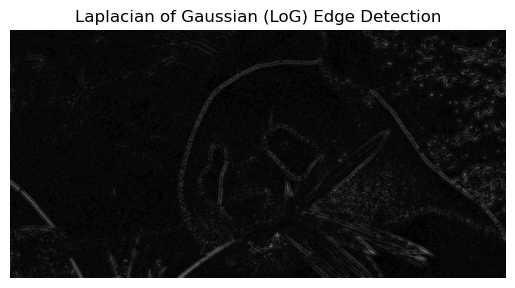

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load the image in grayscale

# Apply Gaussian filter (smooth the image)
sigma = 2  # Standard deviation for the Gaussian kernel
smoothed_image = gaussian_filter(image, sigma=sigma)

# Apply the Laplacian of Gaussian (LoG)
log_image = cv2.Laplacian(smoothed_image, cv2.CV_64F)

# Convert to absolute value to make the edges more visible
log_image = cv2.convertScaleAbs(log_image)

# Display the result
plt.imshow(log_image, cmap='gray')
plt.title('Laplacian of Gaussian (LoG) Edge Detection')
plt.axis('off')
plt.show()

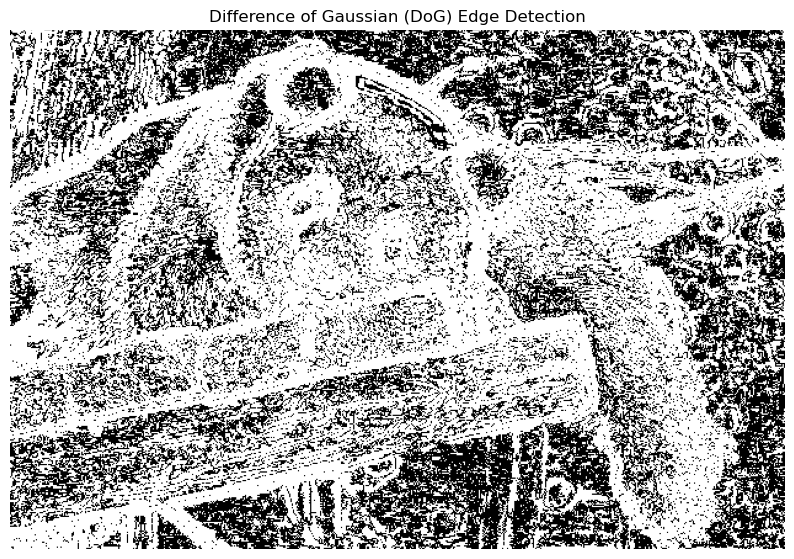

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
def difference_of_gaussian(image, sigma1, sigma2):
    blurred_image1 = gaussian_filter(image, sigma1)
    blurred_image2 = gaussian_filter(image, sigma2)
    dog_image = blurred_image1 - blurred_image2
    return dog_image
def dog_edge_detection(image, sigma1=1.0, sigma2=2.0):
    if len(image.shape) == 3:
        image = np.mean(image, axis=2) 
    dog_edges = difference_of_gaussian(image, sigma1, sigma2)
    dog_edges[dog_edges > 0] = 1
    dog_edges[dog_edges <= 0] = 0
    return dog_edges
dog_edges = dog_edge_detection(image, sigma1=1.0, sigma2=2.0)
plt.figure(figsize=(10, 10))
plt.imshow(dog_edges, cmap='gray')
plt.title("Difference of Gaussian (DoG) Edge Detection")
plt.axis('off')
plt.show()

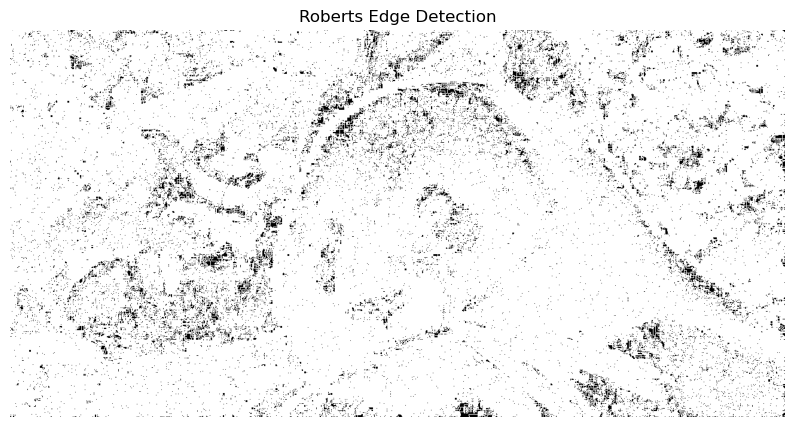

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
def roberts_kernels():
    kernel_x = np.array([[1, 0],
                         [0, -1]])
    kernel_y = np.array([[0, 1],
                         [-1, 0]])
    return kernel_x, kernel_y
def roberts_edge_detection(image):
    if len(image.shape) == 3:
        image = np.mean(image, axis=2) 
    kernel_x, kernel_y = roberts_kernels()
    grad_x = convolve(image, kernel_x)
    grad_y = convolve(image, kernel_y)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    edges = np.where(magnitude > 0, 1, 0)
    return edges
edges = roberts_edge_detection(image)
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title("Roberts Edge Detection")
plt.axis('off')
plt.show()


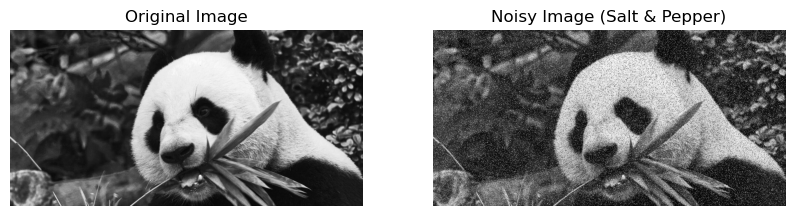

In [23]:

def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy_image = image.copy()
    total_pixels = image.size

    # Add salt noise (white pixels)
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255  # white pixels

    # Add pepper noise (black pixels)
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0  # black pixels

    return noisy_image



# Add salt and pepper noise to the image
noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.08, pepper_prob=0.09)

# Display the original and noisy images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Noisy Image
plt.subplot(1, 2, 2)
plt.title('Noisy Image (Salt & Pepper)')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.show()


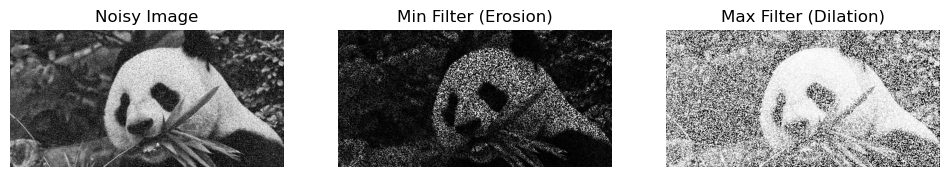

In [24]:

# Define the kernel size (neighborhood size)
kernel_size = 3  # 3x3 neighborhood

# Create a kernel of ones
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Apply Min Filter (Erosion)
min_filtered_image = cv2.erode(noisy_image, kernel, iterations=1)

# Apply Max Filter (Dilation)
max_filtered_image = cv2.dilate(noisy_image, kernel, iterations=1)

# Display the original and filtered images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

# Min Filtered Image (Erosion)
plt.subplot(1, 3, 2)
plt.title('Min Filter (Erosion)')
plt.imshow(min_filtered_image, cmap='gray')
plt.axis('off')

# Max Filtered Image (Dilation)
plt.subplot(1, 3, 3)
plt.title('Max Filter (Dilation)')
plt.imshow(max_filtered_image, cmap='gray')
plt.axis('off')

plt.show()



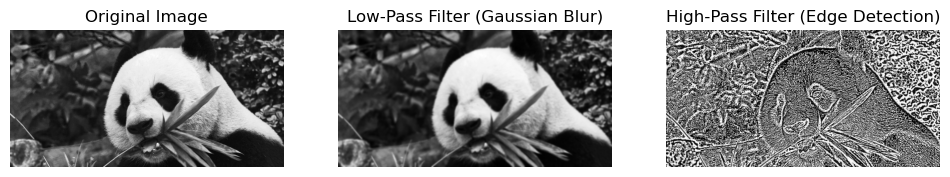

In [25]:
# Low-Pass Filter (Gaussian Blur)
low_pass_filter = cv2.GaussianBlur(image, (15, 15), 0)  # Kernel size (15, 15)

# High-Pass Filter (Edge detection)
# Subtract the low-pass (blurred) image from the original image
high_pass_filter = image - low_pass_filter
high_pass_filter = np.clip(high_pass_filter, 0, 255)  # Ensure pixel values are within valid range

# Display the original and filtered images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Low-Pass Filtered Image (Gaussian Blur)
plt.subplot(1, 3, 2)
plt.title('Low-Pass Filter (Gaussian Blur)')
plt.imshow(low_pass_filter, cmap='gray')
plt.axis('off')

# High-Pass Filtered Image (Edge Detection)
plt.subplot(1, 3, 3)
plt.title('High-Pass Filter (Edge Detection)')
plt.imshow(high_pass_filter, cmap='gray')
plt.axis('off')

plt.show()

